<a href="https://colab.research.google.com/github/deva237/DS-Internship/blob/main/wine_data_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_csv("wine.csv")
X = df.drop('type', axis=1)
X = X.drop('quality', axis=1)
Y = df['quality']
print(X)
print(Y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

[0.07842073 0.10037299 0.08243727 0.08467744 0.08470433 0.08712294
 0.08598538 0.09697722 0.08114459 0.08538309 0.13277403]


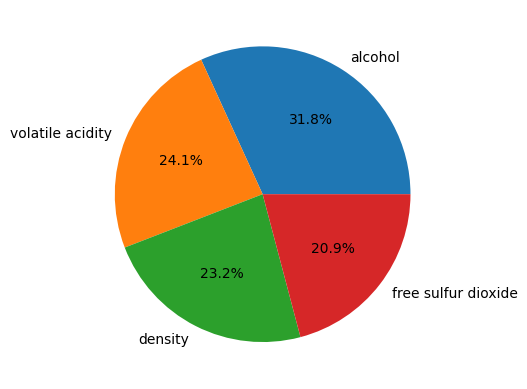

In [3]:
#Feature Selection

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import pandas as pd # Import pandas for DataFrame handling
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder for encoding categorical variables

model = ExtraTreesClassifier()

# Assuming X contains categorical features, encode them using LabelEncoder
le = LabelEncoder()
X_encoded = X.apply(le.fit_transform) # Apply LabelEncoder to all columns in X

model.fit(X_encoded,Y) # Fit the model with encoded features
print(model.feature_importances_)

feat_importance = pd.Series(model.feature_importances_, index=X_encoded.columns) # Use encoded column names
feat_importance.nlargest(4).plot(kind='pie', autopct='%1.1f%%')
#plot(kind='box')
# plot(kind='area')
# plot(kind='line', marker='o')
plt.show()

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the wine quality dataset (assuming it's in CSV format)
wine_data = pd.read_csv('wine.csv')

# Split the dataset into training and test sets
train_df, test_df = train_test_split(wine_data, test_size=0.2, random_state=42)

# Define bins and labels for 'alcohol' column
alcohol_bins = [7, 9, 11, 13, 15]
alcohol_labels = ['Low Alcohol', 'Medium Alcohol', 'High Alcohol', 'Very High Alcohol']

# Apply bins to 'alcohol' column
train_df['AlcoholGroup'] = pd.cut(train_df['alcohol'], bins=alcohol_bins, labels=alcohol_labels, right=False)
test_df['AlcoholGroup'] = pd.cut(test_df['alcohol'], bins=alcohol_bins, labels=alcohol_labels, right=False)

# Define bins and labels for 'pH' column
ph_bins = [2.5, 3, 3.3, 3.5, 4]
ph_labels = ['Very Acidic', 'Moderately Acidic', 'Medium Acidity', 'Low Acidity']

# Apply bins to 'pH' column
train_df['pHGroup'] = pd.cut(train_df['pH'], bins=ph_bins, labels=ph_labels, right=False)
test_df['pHGroup'] = pd.cut(test_df['pH'], bins=ph_bins, labels=ph_labels, right=False)

# Display the first few rows of the modified training data
print(train_df.head())

# Display the first few rows of the modified test data
print(test_df.head())


       type  fixed acidity  volatile acidity  citric acid  residual sugar  \
1916  white            6.6              0.25         0.36             8.1   
947   white            8.5              0.16         0.35             1.6   
877   white            6.0              0.28         0.34             1.6   
2927  white            7.0              0.31         0.31             9.1   
6063    red            8.5              0.44         0.50             1.9   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
1916      0.045                 54.0                 180.0  0.99580  3.08   
947       0.039                 24.0                 147.0  0.99350  2.96   
877       0.119                 33.0                 104.0  0.99210  3.19   
2927      0.036                 45.0                 140.0  0.99216  2.98   
6063      0.369                 15.0                  38.0  0.99634  3.01   

      sulphates  alcohol  quality    AlcoholGroup            pHGroup  
191

In [5]:
print(df.isnull().sum())

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


In [7]:
# dealing with missing values
df['fixed acidity'].fillna((df['fixed acidity'].mean()), inplace=True)
df['volatile acidity'].fillna((df['volatile acidity'].mean()), inplace=True)
df['citric acid'].fillna((df['citric acid'].mean()), inplace=True)
df['residual sugar'].fillna((df['residual sugar'].mean()), inplace=True)
df['chlorides'].fillna((df['chlorides'].mean()), inplace=True)

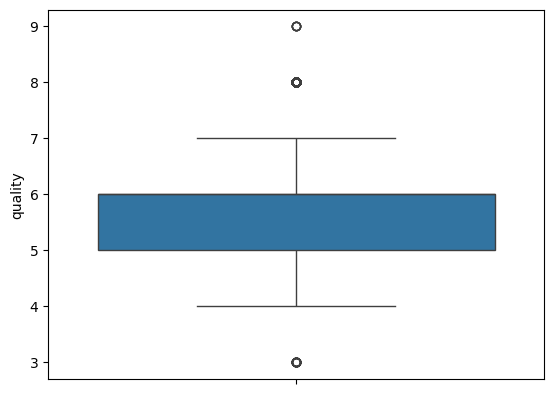

In [8]:
#Identifying Outliers by ploting

from matplotlib import pyplot as plt
import seaborn as sns
sns.boxplot(df['quality'])
plt.show()

In [10]:
#Dealing with Outliers using Interquantile Range
# Check the data type of the column and convert if necessary
if df['quality'].dtype == object:
    df['quality'] = pd.to_numeric(df['quality'], errors='coerce') # Convert to numeric, replace non-numeric with NaN

# Fill NaN values if any were introduced during conversion
df['quality'].fillna(df['quality'].mean(), inplace=True) # Replace NaN with mean

print(df['quality'])
Q1 = df['quality'].quantile(0.25)
Q3 = df['quality'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(upper)
print(lower)

out1=df[df['quality'] < lower].values
out2=df[df['quality'] > upper].values

df['quality'].replace(out1,lower,inplace=True)
df['quality'].replace(out2,upper,inplace=True)

print(df['quality'])

0       6
1       6
2       6
3       6
4       6
       ..
6492    5
6493    6
6494    6
6495    5
6496    6
Name: quality, Length: 6497, dtype: int64
1.0
7.5
3.5
0       6
1       6
2       6
3       6
4       6
       ..
6492    5
6493    6
6494    6
6495    5
6496    6
Name: quality, Length: 6497, dtype: int64


In [13]:
# Cell 11
#Oversampling and Under Sampling

from collections import Counter
print(Counter(Y))
from imblearn.over_sampling import RandomOverSampler     #Random OverSampling
ros=RandomOverSampler(random_state=0)
X, Y = ros.fit_resample(X,Y)
print(Counter(Y))


# Before applying SMOTE, fill NaN values in 'X'
X = X.fillna(X.mean()) # Fill NaN with the mean of each column

from imblearn.over_sampling import SMOTE                 #Synthetic Minority Oversampling (SMOTE) oversampling
sms=SMOTE(random_state=0)
X, Y=sms.fit_resample(X,Y)

from imblearn.under_sampling import RandomUnderSampler   #Random UnderSampling
rus=RandomUnderSampler(random_state=0)
X, Y=rus.fit_resample(X,Y)

Counter({3: 2836, 4: 2836, 5: 2836, 6: 2836, 7: 2836, 8: 2836, 9: 2836})
Counter({3: 2836, 4: 2836, 5: 2836, 6: 2836, 7: 2836, 8: 2836, 9: 2836})


In [15]:
#Principal Component Analysis

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd # Import pandas for handling DataFrames

logr=LogisticRegression()
pca=PCA(n_components=2)

X = df.drop('type', axis=1)
X = X.drop('quality', axis=1)
Y = df['quality']

# Fill any remaining NaN values in the entire DataFrame 'X'
X.fillna(X.mean(), inplace=True)  # Fill NaN with the mean of each column

pca.fit(X)
X=pca.transform(X)

print(X)

X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0,test_size=0.3)

logr.fit(X_train,y_train)

y_pred=logr.predict(X_test)
print(accuracy_score(y_test,y_pred))

[[ 56.71859519   1.80583369]
 [ 11.84866887 -19.90512303]
 [-18.28844618   3.84827411]
 ...
 [-74.11345473  15.99233454]
 [-69.5385634   17.97886794]
 [-74.64836631   4.85634586]]
0.4241025641025641


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## **Clustering**


In [17]:
#Clustering

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

KM= KMeans(n_clusters=3, random_state=0)
wne=load_wine()
x=wne.data

X_train,X_test=train_test_split(x,random_state=0)

KM.fit(X_train)

y_pred=KM.predict(X_test)

center=KM.cluster_centers_

print(center)
print(y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[1.25673469e+01 2.58020408e+00 2.30265306e+00 2.10816327e+01
  9.36530612e+01 2.00408163e+00 1.61836735e+00 4.00612245e-01
  1.43265306e+00 4.10775508e+00 9.33877551e-01 2.46204082e+00
  4.66122449e+02]
 [1.37658824e+01 1.88647059e+00 2.40294118e+00 1.68058824e+01
  1.04117647e+02 2.86705882e+00 3.03470588e+00 2.80588235e-01
  1.95500000e+00 5.67205882e+00 1.08323529e+00 3.13470588e+00
  1.18785294e+03]
 [1.29016000e+01 2.54860000e+00 2.40160000e+00 1.98140000e+01
  1.04640000e+02 2.10220000e+00 1.55580000e+00 3.84800000e-01
  1.54780000e+00 5.71820000e+00 8.68120000e-01 2.33440000e+00
  7.29960000e+02]]
[1 0 0 1 0 0 1 0 0 0 2 0 1 2 2 0 1 1 0 1 0 1 2 2 2 0 0 0 2 2 1 1 0 1 1 2 2
 0 0 2 2 1 0 0 0]


# **VISUALIZATION**

In [19]:
import pandas as pd              #pd is an Alias
from matplotlib import pyplot as plt
import seaborn as sns


df=pd.read_csv("wine.csv")

#Preparing X and Y

X = df.drop('type', axis=1)
X = X.drop('quality', axis=1)
Y = df['quality']

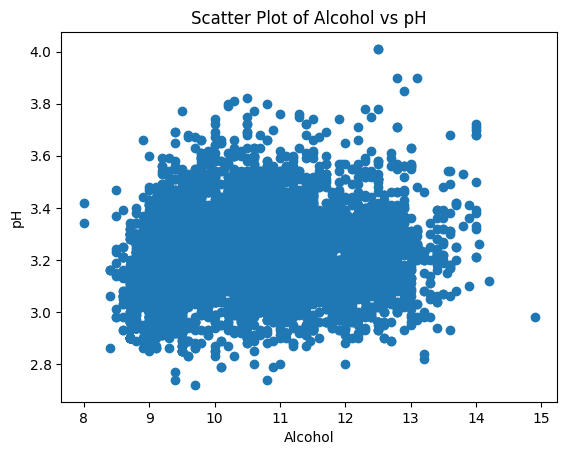

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the wine quality dataset (assuming it's in CSV format)
wine_data = pd.read_csv('wine.csv')

# Plotting PetalLengthCm vs PetalWidthCm
plt.scatter(wine_data['alcohol'], wine_data['pH'])
plt.title("Scatter Plot of Alcohol vs pH")
plt.xlabel("Alcohol")
plt.ylabel("pH")
plt.show()


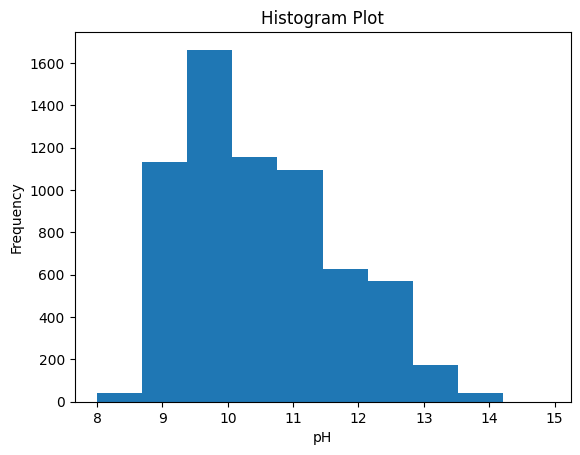

In [21]:
#Histrogram shows the distribution of a continuous variable.
  # It can discover the frequency distribution for a single variable in a univariate analysis.
plt.hist(df["alcohol"])
plt.title("Histogram Plot")
plt.xlabel("pH")
plt.ylabel("Frequency")
plt.show()

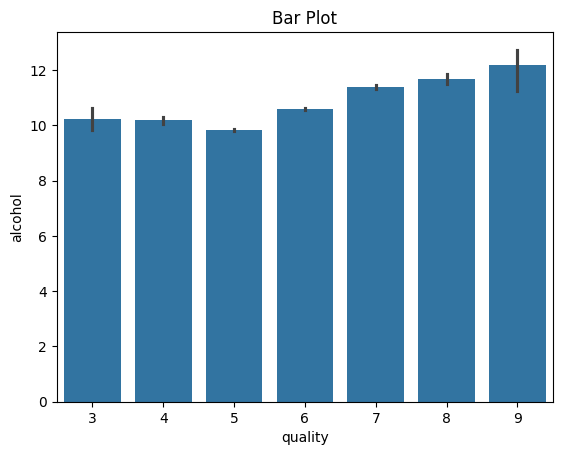

In [23]:
#Bar Chart or Bar Plot is used to represent categorical data with vertical or horizontal bars.
sns.barplot(x="quality", y="alcohol", data=df) # Pass data as a named argument and specify x and y
plt.title("Bar Plot")
plt.show()

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

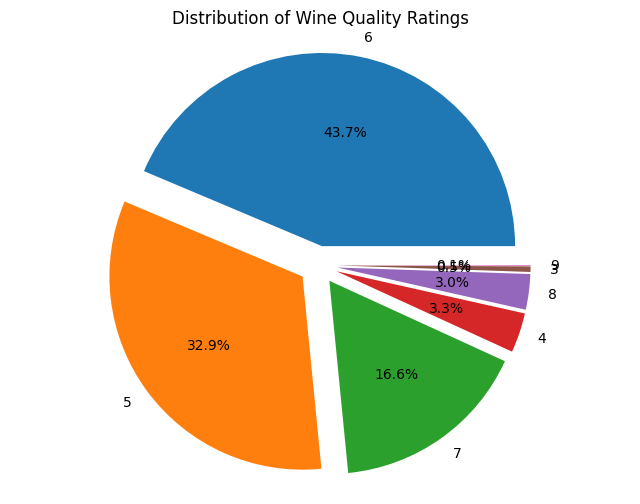

In [31]:
#Pie Chart is a type of plot which is used to represent the proportion of each category in categorical data.
import matplotlib.pyplot as plt

# Example loading (replace with your actual dataset loading)
# df = pd.read_csv('wine_quality.csv')

# Display the first few rows to understand the structure
print(df.head())

# Counting the frequency of each 'quality' category
quality_counts = df['quality'].value_counts()

# Creating an explode tuple with the correct length
explode = tuple([0.1] * len(quality_counts)) # Adjust 0.1 to your desired explosion value

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', explode=explode) # Use the dynamically created explode tuple
plt.title('Distribution of Wine Quality Ratings')
plt.axis('equal')
plt.show()


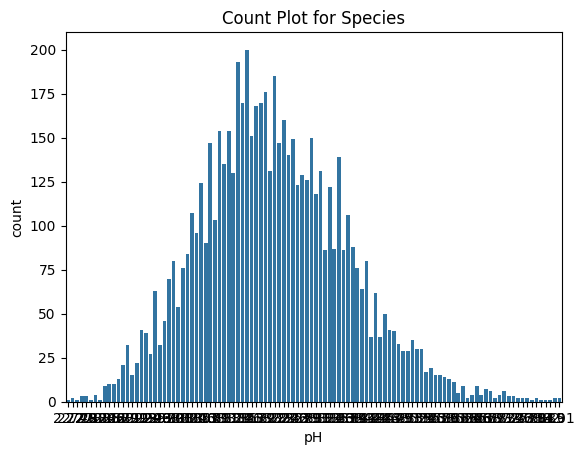

In [25]:
#Count Plot s similar to a bar plot except that we only pass the X-axis and Y-axis represents explicitly counting the number of occurrences. Each bar represents count for each category of species.
sns.countplot(x='pH', data = df)
plt.title("Count Plot for Species")
plt.show()

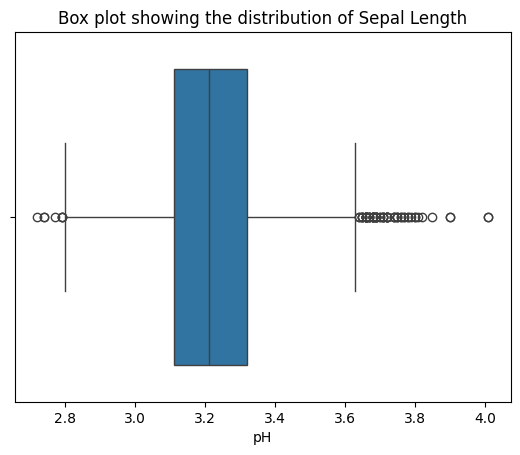

In [28]:
#Box Plot Boxplot is used to show the distribution of a variable. The box plot is a standardized way of displaying the distribution of data based on the five-number summary: minimum, first quartile, median, third quartile, and maximum.
sns.boxplot(x='pH', data = df) #if x horizontal and if y vertical
plt.title("Box plot showing the distribution of Sepal Length")
plt.show()

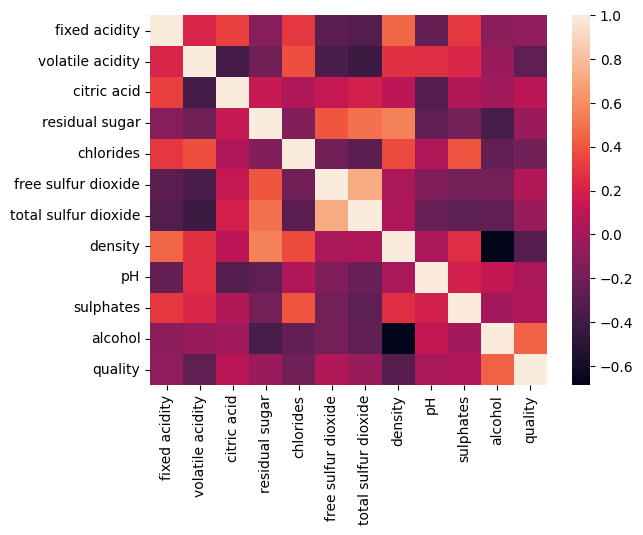

In [30]:
#Heatmap is a type of Matrix plot that allows you to plot data as color-encoded matrices. It is mostly used to find multi-collinearity in a dataset.
numeric_df = df.select_dtypes(include=['number']) # Select only numeric columns for correlation calculation
sns.heatmap(numeric_df.corr())
plt.show()